In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import linear_model,preprocessing,model_selection
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['StudentsPerformance.csv']


In [47]:
# Lets assume the passmark to be 40
passmark = 40

In [48]:
# Input the CSV file
data = pd.read_csv("../input/StudentsPerformance.csv")

In [49]:
# Printing the first 5 rows
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [50]:
# Describing the data
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [51]:
# Renaming Columns
data.rename(columns={'race/ethnicity':'race','parental level of education':'parent','test preparation course':'test',
                    'math score':'math','reading score':'reading','writing score':'writing'},inplace=True)
data.head()

,gender,race,parent,lunch,test,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [52]:
data.test.unique()

array(['none', 'completed'], dtype=object)

In [53]:
# To check for missing values
data.isnull().sum()

gender     0
race       0
parent     0
lunch      0
test       0
math       0
reading    0
writing    0
dtype: int64

In [54]:
# Handling the Categorical data

data.loc[data["gender"]=="male","gender"]=0
data.loc[data["gender"]=="female","gender"]=1
data.loc[data["race"]=="group A","race"] = 0
data.loc[data["race"]=="group B","race"] = 1
data.loc[data["race"]=="group C","race"] = 2
data.loc[data["race"]=="group D","race"] = 3
data.loc[data["race"]=="group E","race"] = 4
data.loc[data["parent"]=="bachelor's degree","parent"] = 0
data.loc[data["parent"]=="some college","parent"] = 1
data.loc[data["parent"]=="master's degree","parent"] = 2
data.loc[data["parent"]=="associate's degree","parent"] = 3
data.loc[data["parent"]=="high school","parent"] = 4
data.loc[data["parent"]=="some high school","parent"] = 5
data.loc[data["lunch"]=="standard","lunch"] = 0
data.loc[data["lunch"]=="free/reduced","lunch"] = 1
data.loc[data["test"]=="none","test"] = 0
data.loc[data["test"]=="completed","test"] = 1

data.head()

,gender,race,parent,lunch,test,math,reading,writing
0,1,1,0,0,0,72,72,74
1,1,2,1,0,1,69,90,88
2,1,1,2,0,0,90,95,93
3,0,0,3,1,0,47,57,44
4,0,2,1,0,0,76,78,75


In [55]:
# To find how many have passed and failed
data["pass_math"] = np.where(data["math"]>passmark,'P','F')
data.pass_math.value_counts()

P    950
F     50
Name: pass_math, dtype: int64

Text(0, 0.5, 'Maths scores')

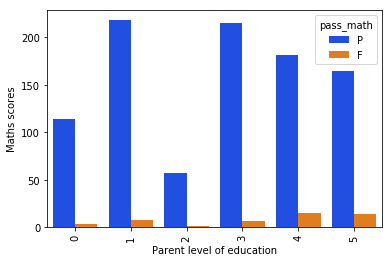

In [67]:
p = sns.countplot(x='parent', data = data, hue='pass_math', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) # To set colors for different plots
plt.xlabel("Parent level of education")
plt.ylabel("Maths scores")

In [57]:
X = data[["gender","race","parent","lunch","test"]].values
y = data["math"].values
reading = data["reading"].values
writing = data["writing"].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(X_train,y_train)

test = classifier_.predict(y_test)